In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [ ]:
# Read IMDb Basics & Ratings datasets
# The basics includes 9 features for 7 million titles

# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

basics_tsv_file = "//content/title.basics.tsv" #"C:\\Users\.....\Downloads\\basics1.tsv"
#!unzip basics_tsv_file
basics = pd.read_csv(basics_tsv_file, sep='\t',low_memory=False, error_bad_lines=False)
basics.shape

(27133, 9)

In [ ]:
# There are 1 million movies in the ratings datasets
# The ratings includes 3 features for 1 million titles

#title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
#tconst (string) - alphanumeric unique identifier of the title
#averageRating – weighted average of all the individual user ratings
#numVotes - number of votes the title has received
ratings_tsv_file = "//content/title.ratings.tsv"#"C:\\Users\.....\Downloads\\ratings1.tsv"
ratings = pd.read_csv(ratings_tsv_file, sep='\t')

ratings.shape

(241159, 3)

In [ ]:
# Merge IMDb Basics & Ratings datasets by tconst
# The new dataset has 1 million movies
data = pd.merge(basics, ratings, on ="tconst")
data.shape

(11544, 11)

In [ ]:
data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short",5.7,1846.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,\N,5,"Animation,Short",6.0,237.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1611.0
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,\N,12,"Animation,Short",6.1,154.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short",6.2,2434.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894.0,\N,1,Short,5.2,160.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894.0,\N,1,"Short,Sport",5.4,760.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short",5.5,1991.0
8,tt0000009,short,Miss Jerry,Miss Jerry,0.0,1894.0,\N,40,"Romance,Short",5.9,192.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short",6.9,6651.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 11543
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          11544 non-null  object 
 1   titleType       11544 non-null  object 
 2   primaryTitle    11544 non-null  object 
 3   originalTitle   11544 non-null  object 
 4   isAdult         11544 non-null  float64
 5   startYear       11544 non-null  float64
 6   endYear         11544 non-null  object 
 7   runtimeMinutes  11544 non-null  object 
 8   genres          11544 non-null  object 
 9   averageRating   11544 non-null  float64
 10  numVotes        11544 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.1+ MB


In [ ]:
data.describe(include= "all")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
count,11544,11544,11544,11544,11544.0,11544.000000,11544,11544,11544,11544.000000,11544.000000
unique,11544,4,10945,10992,NaN,NaN,2,231,473,NaN,NaN
top,tt0015543,movie,Hamlet,Hamlet,NaN,NaN,\N,\N,Drama,NaN,NaN
freq,1,8020,7,7,NaN,NaN,11543,1436,1697,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.0,1925.446639,NaN,NaN,NaN,6.050095,513.669872
std,NaN,NaN,NaN,NaN,0.0,9.186004,NaN,NaN,NaN,1.009483,4208.299611
min,NaN,NaN,NaN,NaN,0.0,1892.000000,NaN,NaN,NaN,1.000000,6.000000
25%,NaN,NaN,NaN,NaN,0.0,1920.000000,NaN,NaN,NaN,5.500000,21.000000
50%,NaN,NaN,NaN,NaN,0.0,1928.000000,NaN,NaN,NaN,6.100000,51.000000
75%,NaN,NaN,NaN,NaN,0.0,1933.000000,NaN,NaN,NaN,6.700000,192.250000


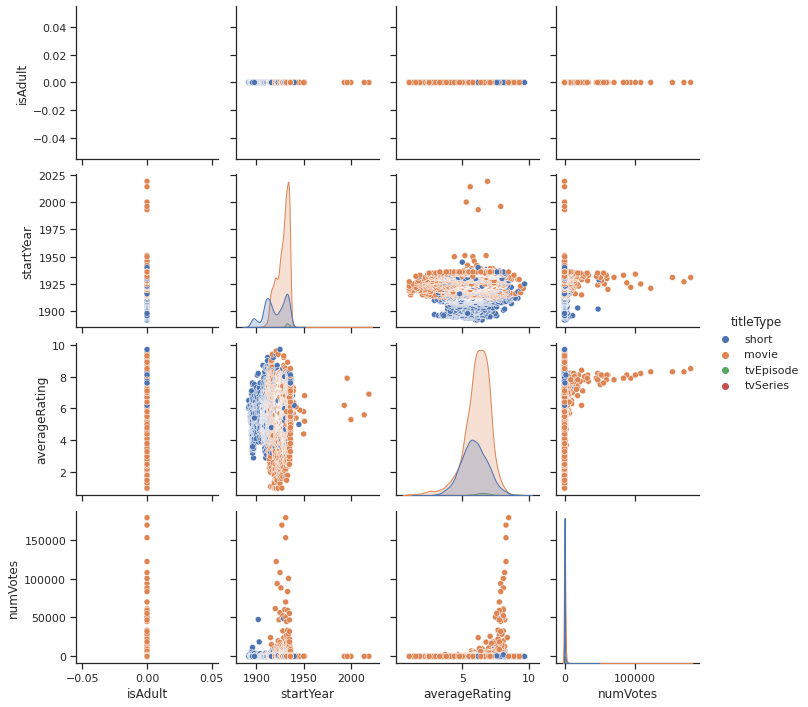

In [ ]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb Title Types')

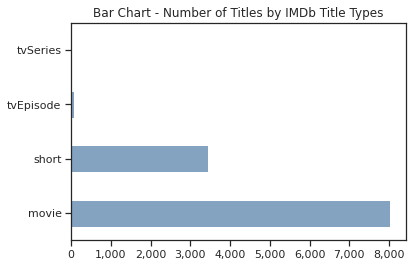

In [ ]:
# Distribution of the 10 Title Types (bar chart)
import matplotlib.pyplot as plt
ax = data['titleType'].value_counts().plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
import matplotlib.ticker as mtick
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks()

plt.title('Bar Chart - Number of Titles by IMDb Title Types')

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb Title Types')

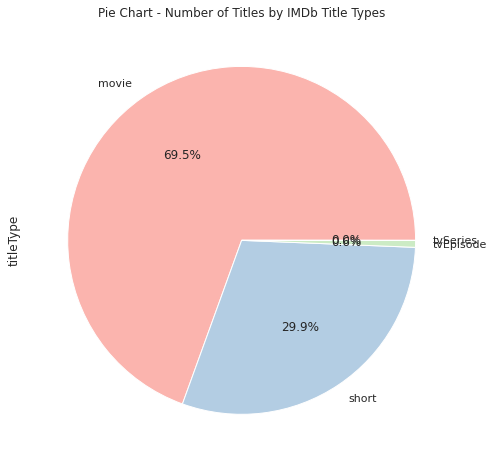

In [ ]:
# Distribution of the 10 Title Types (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['titleType'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb Title Types')

In [ ]:
# Check genres 
data['genres'].value_counts().head()

Drama            1697
Comedy,Short     1064
Comedy            732
Western           605
Drama,Romance     535
Name: genres, dtype: int64

Text(0.5, 1.0, 'Pie Chart - Number of Titles by IMDb genres')

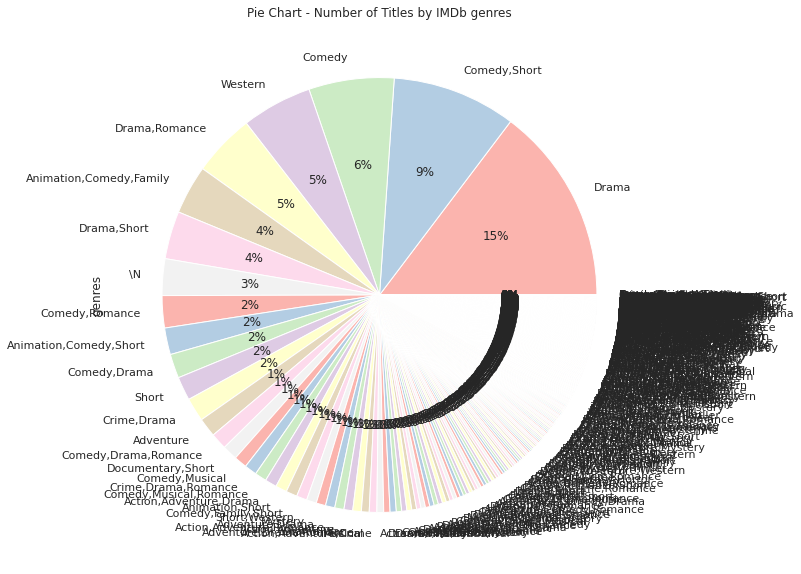

In [ ]:
# Distribution of the 10 genres (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['genres'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(10, 10), colors=colors)
plt.title('Pie Chart - Number of Titles by IMDb genres')

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb genres')

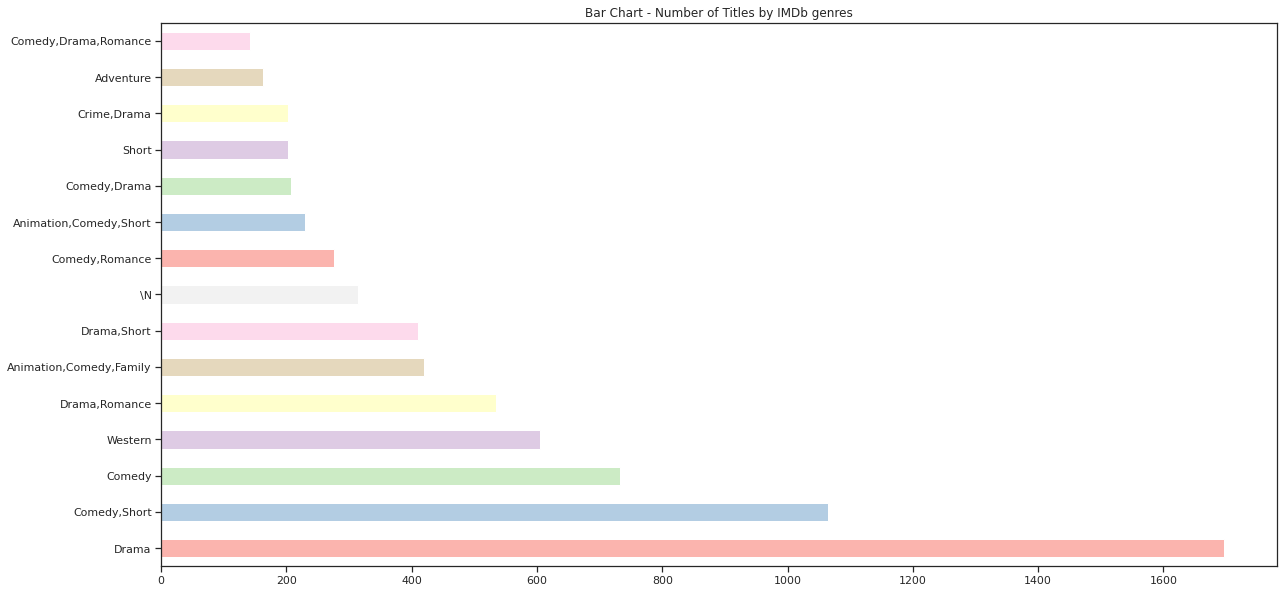

In [ ]:
# Distribution of the 10 Title Types (bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

import matplotlib.pyplot as plt
ax = data['genres'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)
# color=(0.2, 0.4, 0.6, 0.6),
plt.title('Bar Chart - Number of Titles by IMDb genres')

In [ ]:
# Lesson learned 1: can't use astype where NaN's are applicable
# Instead, use pd.to_numeric & pd.to_datetime
# Lesson learned 2: had i transformed the types without looking into the details, i would've transfered
# the incorrect 2014 and 2019 into isAdult 1
# Just keep the isAdult as is...
data['isAdult']=data['isAdult'].astype('bool')
data['runtimeMinutes']= pd.to_numeric(data['runtimeMinutes'], errors='coerce')
data['startYear']= pd.to_datetime(data['startYear'], errors='coerce')
data['endYear']= pd.to_datetime(data['endYear'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 11543
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tconst          11544 non-null  object        
 1   titleType       11544 non-null  object        
 2   primaryTitle    11544 non-null  object        
 3   originalTitle   11544 non-null  object        
 4   isAdult         11544 non-null  bool          
 5   startYear       11544 non-null  datetime64[ns]
 6   endYear         1 non-null      datetime64[ns]
 7   runtimeMinutes  10108 non-null  float64       
 8   genres          11544 non-null  object        
 9   averageRating   11544 non-null  float64       
 10  numVotes        11544 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(3), object(5)
memory usage: 1003.3+ KB


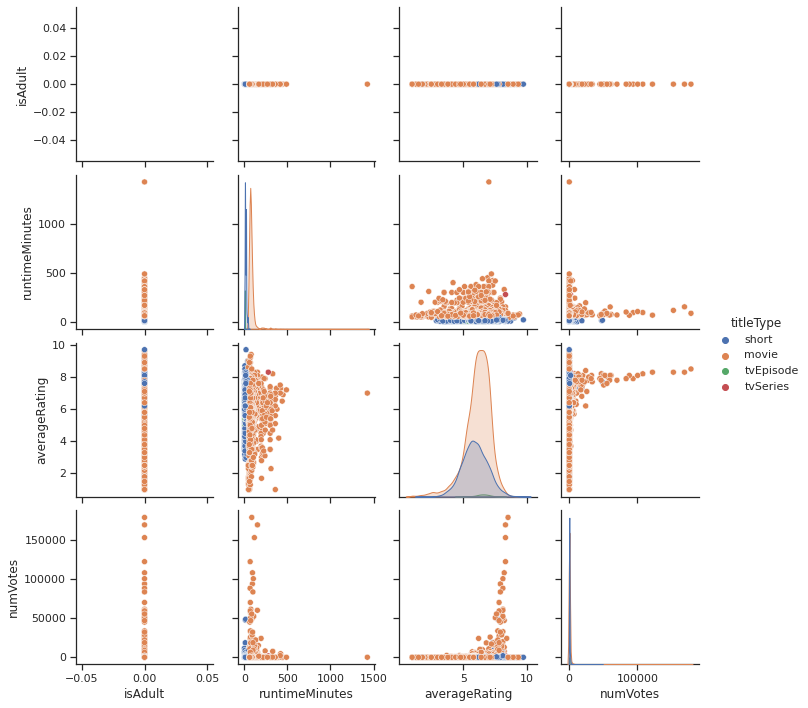

In [ ]:
# Pair plots - scatterplots for joint relationships and histograms for univariate distributions
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue= 'titleType')

Text(0.5, 1.0, 'Pie Chart - Adult Titles or Not')

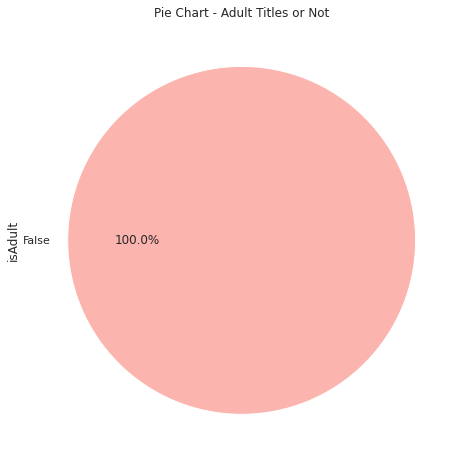

In [ ]:
# Distribution of Adult movies (pie chart)
# 98.2% of the movies are not Adult ones
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

data['isAdult'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Adult Titles or Not')

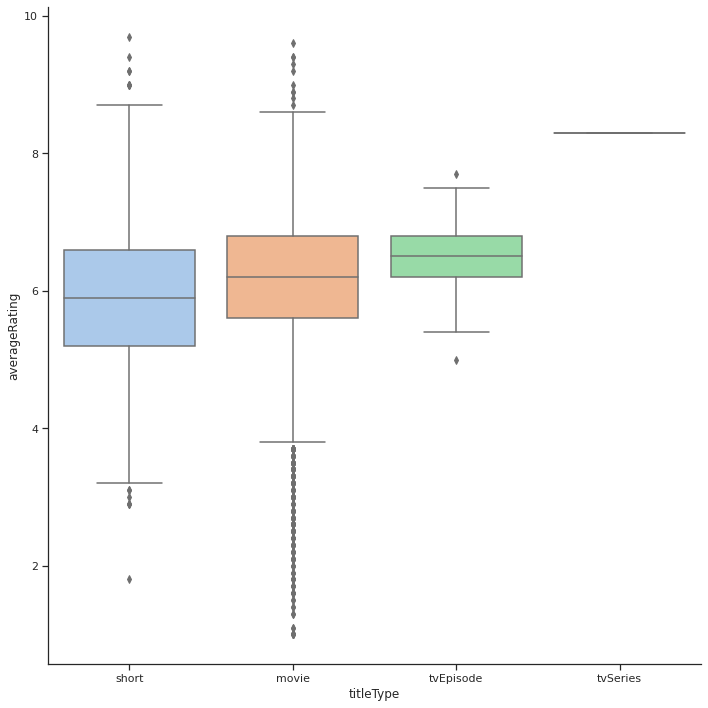

In [ ]:
# Distribution of the averageRating
# Skewed to the left
sns.catplot(x="titleType", y="averageRating", hue="titleType", height =10, palette="pastel",
            kind="box", dodge=False, data=data);